In [1]:
# Dependencies
import gempy as gp
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from gempy.assets import topology as tp

import warnings

warnings.filterwarnings("ignore")

pd.set_option("precision", 2)

# Creating model object and indicating path
data_path = "../../../input/BES/stratbr_grid_v2.0/"
geo_model = gp.create_model("StratBR_BES_v2.0")

Not subsurface compatibility available


WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


## Step by Step Lesser Grid (89-99)

In [2]:
# Loading model, the extension, the resolution and importing the data
gp.init_data(
    geo_model,
    extent=[0, 179000, 0, 148000, -15000, 0],
    resolution=[50, 50, 50],
    path_i=data_path + "sp_89n99_lessgrid_1.csv",
    path_o=data_path + "orientations_points.csv",
)

Active grids: ['regular']


StratBR_BES_v2.0  2023-09-19 10:33

In [3]:
# Ordenando as surfaces (Estratigrafia (topo para base)) 3
gp.map_stack_to_surfaces(
    geo_model,
    {
        "Strat_Series": ("bes_89", "bes_99"),
        "Basement_series": ("basement",),
    },
)

,surface,series,order_surfaces,color,id
0,bes_89,Strat_Series,1,#015482,1
1,bes_99,Strat_Series,2,#9f0052,2
2,basement,Basement_series,1,#ffbe00,3


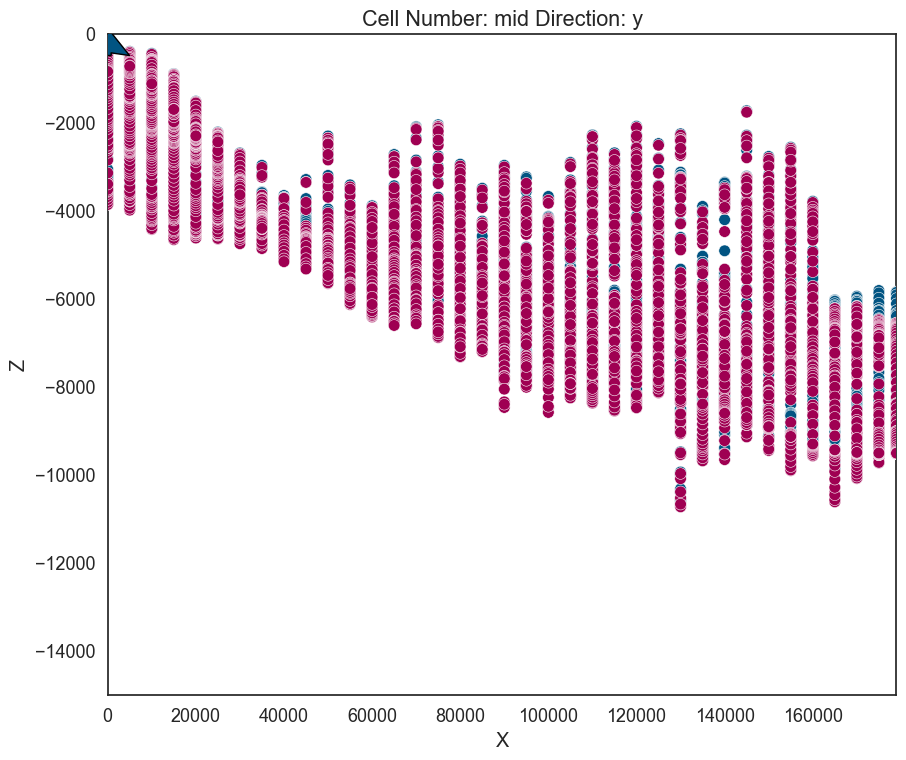

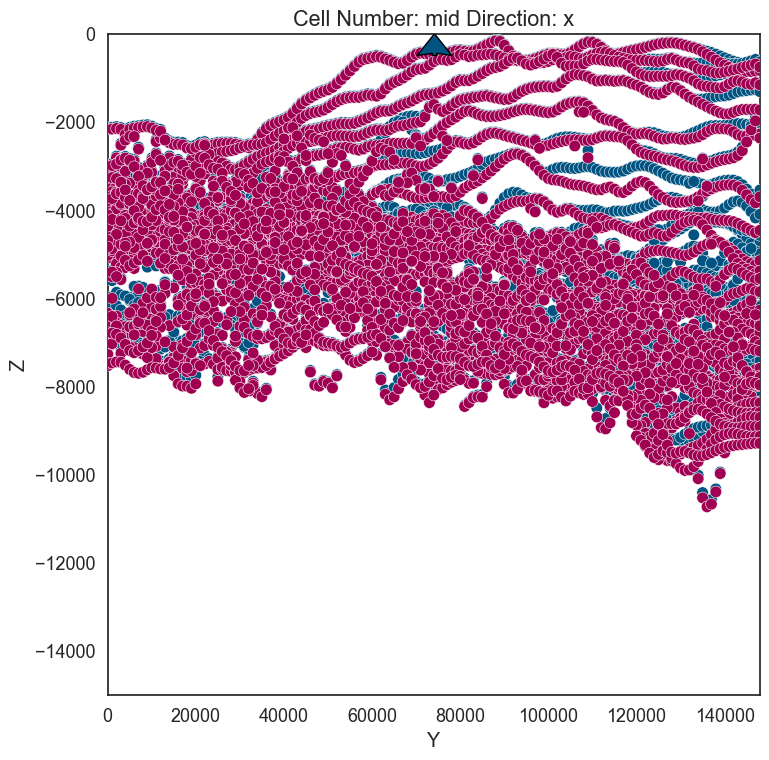

In [4]:
# Seção transversal do modelo
gp.plot_2d(
    geo_model, direction="y", show_data=True, show_lith=True, ve=10, legend=False
)
gp.plot_2d(
    geo_model, direction="x", show_data=True, show_lith=True, ve=10, legend=False
)
# gp.plot_2d(geo_model, direction="z", show_data=True, show_lith=True, ve=1, legend=False)

In [5]:
# Ver os dados em 3D
gpv = gp.plot_3d(
    geo_model,
    plotter_type="basic",
    show_data=True,
    show_surfaces=True,
    ve=5,
)

In [6]:
%%time
gp.set_interpolator(
    geo_model, 
    theano_optimizer='fast_run', # fast_compile, fast_run
    compile_theano=True, 
    dtype="float64",  # for model stability
)

Setting kriging parameters to their default values.
Compiling theano function...
Level of Optimization:  fast_run
Device:  cpu
Precision:  float64
Number of faults:  0
Compilation Done!
Kriging values: 
                         values
range                 232744.5
$C_o$            1289761904.76
drift equations         [3, 3]
Wall time: 33.1 s


In [7]:
%%time
sol = gp.compute_model(geo_model,compute_mesh=True)

Wall time: 4min 46s


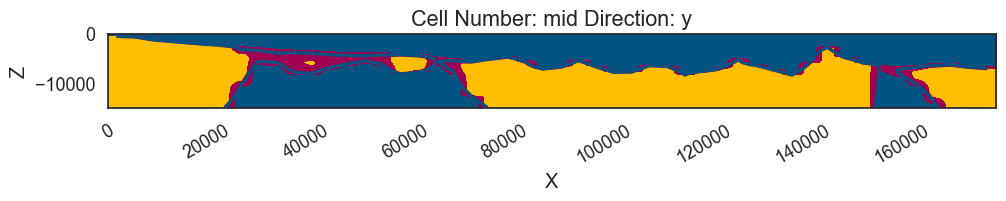

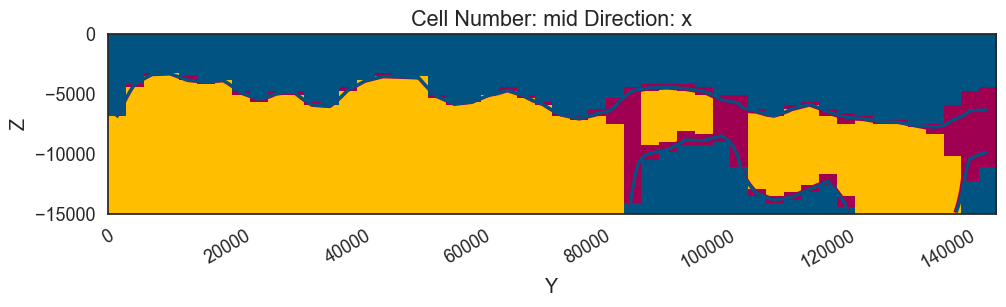

In [8]:
# Seção transversal do modelo
gp.plot_2d(
    geo_model,
    direction="y",
    show_data=False,
    show_lith=True,
    ve=1,
)
gp.plot_2d(
    geo_model,
    direction="x",
    show_data=False,
    show_lith=True,
    ve=2,
    legend=True,
)

## Step by step Full Grid (89-99)

In [2]:
# Loading model, the extension, the resolution and importing the data
gp.init_data(
    geo_model,
    extent=[0, 179000, 0, 148000, -15000, 0],
    resolution=[50, 50, 50],
    path_i=data_path + "sp_89n99_fullgrid.csv",
    path_o=data_path + "orientations_points.csv",
)

Active grids: ['regular']


StratBR_BES_v2.0  2023-09-19 10:30

In [3]:
gp.get_data(
    geo_model,
    "surfaces",
)

,surface,series,order_surfaces,color,id
0,bes_89,Default series,1,#015482,1
1,bes_99,Default series,2,#9f0052,2
2,basement,Basement,1,#ffbe00,3


In [4]:
# Ordenando as surfaces (Estratigrafia (topo para base)) 3
gp.map_stack_to_surfaces(
    geo_model,
    {
        "Strat_Series_89Ma": ("bes_89"),
        "Basement_series": ("basement",),
    },
)

,surface,series,order_surfaces,color,id
0,bes_89,Strat_Series_89Ma,1,#015482,1
1,basement,Basement_series,1,#9f0052,2


In [ ]:
# Ordenando as surfaces (Estratigrafia (topo para base)) 1
gp.map_stack_to_surfaces(
    geo_model,
    {
        "Strat_Series": (
            "TOP",
            "BOT",
            "MID",
        ),
        "Basement_series": ("basement",),
    },
)

In [ ]:
# Ordenando as surfaces (Estratigrafia (topo para base)) 2
gp.map_stack_to_surfaces(
    geo_model,
    {
        "Strat_Series": (
            "T",
            "M1",
            "M2",
            "M3",
            "B",
        ),
        "Basement_series": ("basement",),
    },
)

In [4]:
# Ordenando as surfaces (Estratigrafia (topo para base)) 3
gp.map_stack_to_surfaces(
    geo_model,
    {
        "Strat_Series": ("bes_89", "bes_99"),
        "Basement_series": ("basement",),
    },
)

,surface,series,order_surfaces,color,id
0,bes_89,Strat_Series,1,#015482,1
1,bes_99,Strat_Series,2,#9f0052,2
2,basement,Basement_series,1,#ffbe00,3


In [ ]:
# Ordenando as surfaces (Estratigrafia (topo para base)) 4
gp.map_stack_to_surfaces(
    geo_model,
    {
        "Strat_Series": (
            "TOP",
            "BOT",
        ),
        "Basement_series": ("basement",),
    },
)

In [ ]:
geo_model.set_default_orientation()

In [5]:
geo_model.get_data()

X       Y     Z    smooth surface           G_x   
surface_points 0           0       0 -3336  0.000002  bes_89           NaN  \
               1        1000       0 -3403  0.000002  bes_89           NaN   
               2        2000       0 -3542  0.000002  bes_89           NaN   
               3        3000       0 -3668  0.000002  bes_89           NaN   
               4        4000       0 -3790  0.000002  bes_89           NaN   
...                      ...     ...   ...       ...     ...           ...   
               26816  176000  148000 -8923  0.000002  bes_89           NaN   
               26817  177000  148000 -8924  0.000002  bes_89           NaN   
               26818  178000  148000 -8924  0.000002  bes_89           NaN   
               26819  179000  148000 -8921  0.000002  bes_89           NaN   
orientations   0           0   74000  -475  0.010000  bes_89  1.000000e-12   

                               G_y  G_z  
surface_points 0               NaN  NaN  
               1               NaN  NaN  
               2               NaN  NaN  
               3               NaN  NaN  
               4               NaN  NaN  
...                            ...  ...  
               26816           NaN  NaN  
               26817           NaN  NaN  
               26818           NaN  NaN  
               26819           NaN  NaN  
orientations   0      1.000000e-12  1.0  

[26821 rows x 8 columns]

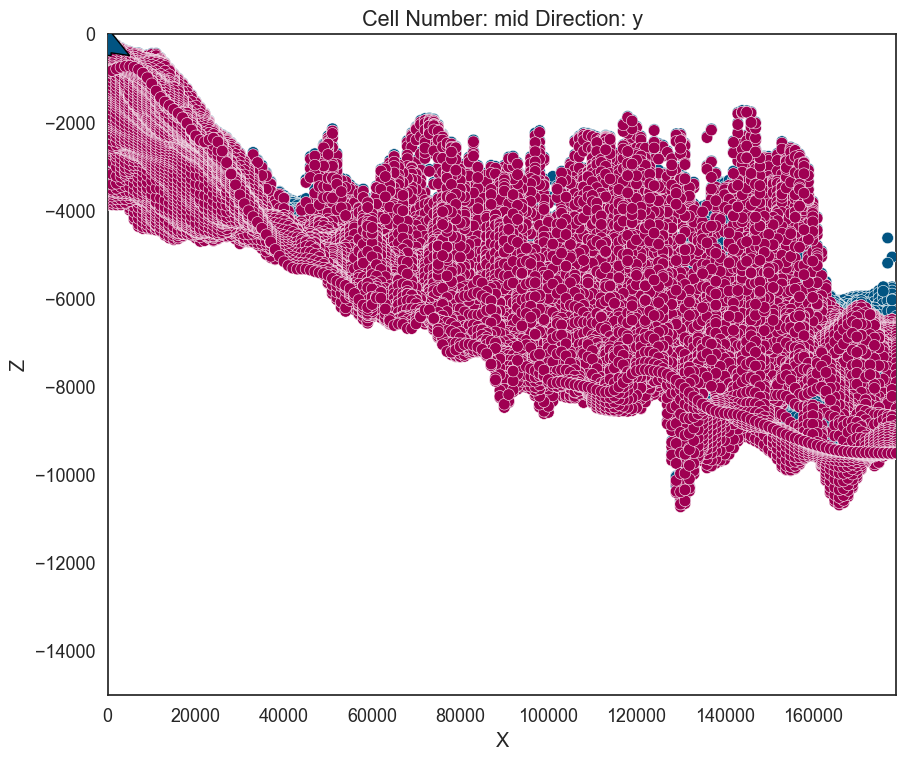

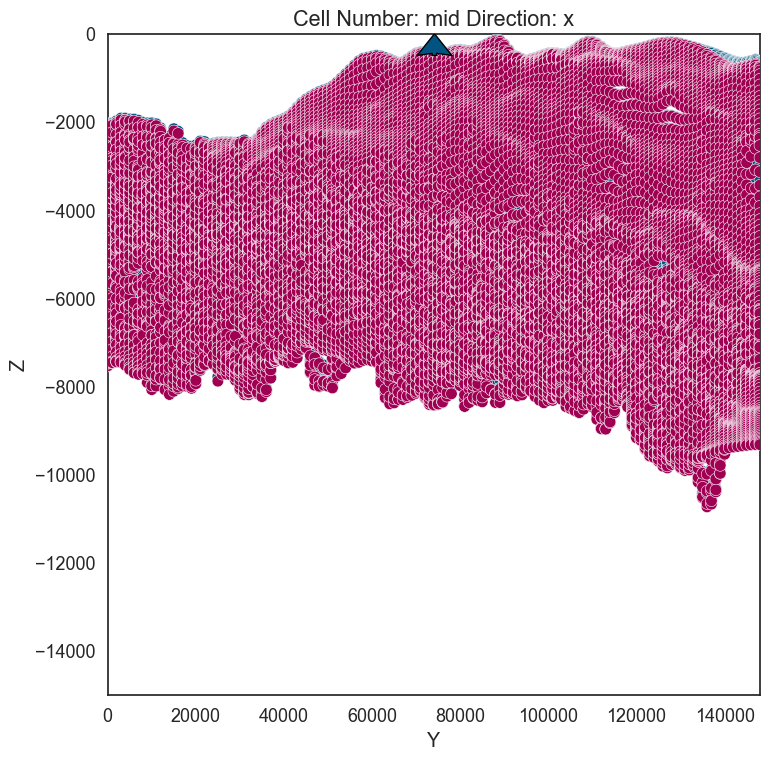

In [5]:
# Seção transversal do modelo
gp.plot_2d(
    geo_model, direction="y", show_data=True, show_lith=True, ve=10, legend=False
)
gp.plot_2d(
    geo_model, direction="x", show_data=True, show_lith=True, ve=10, legend=False
)
# gp.plot_2d(geo_model, direction="z", show_data=True, show_lith=True, ve=1, legend=False)

In [6]:
# Ver os dados em 3D
gpv = gp.plot_3d(
    geo_model,
    plotter_type="basic",
    show_data=True,
    show_surfaces=True,
    ve=5,
)

In [7]:
# Ver os dados em 3D
gpv = gp.plot_3d(
    geo_model,
    plotter_type="basic",
    image=False,
    show_data=True,
    show_surfaces=True,
    show_scalar=True,
    show_boundaries=True,
    ve=1,
)

In [ ]:
%%time
gp.set_interpolator(
    geo_model, 
    output=['geology'], 
    compile_theano=True, 
    theano_optimizer='fast_run', # fast_compile, fast_run
    dtype="float64",  # for model stability
    verbose=[]
)

In [ ]:
%%time
gp.compute_model(
    geo_model, 
    compute_mesh=True,
    )

In [ ]:
topo_init = tp.compute_topology(
    geo_model, direction="x", voxel_threshold=1
)  # , direction="Y", cell_number=15)
edges_init, centroids_init = tp.clean_unconformity_topology(
    geo_model, 1, topo_init[0], topo_init[1]
)

In [ ]:
# Seção transversal do modelo
gp.plot_2d(
    geo_model,
    direction="y",
    show_data=False,
    show_lith=True,
    ve=1,
)
gp.plot_2d(
    geo_model,
    direction="x",
    show_data=False,
    show_lith=True,
    ve=2,
    legend=True,
)

In [ ]:
# Seção transversal do modelo
gp.plot_2d(
    geo_model,
    direction="y",
    show_data=False,
    show_lith=True,
    ve=1,
)
gp.plot.plot_topology(geo_model, edges_init, centroids_init)

In [ ]:
# Ver os dados em 3D
gpv = gp.plot_3d(geo_model, image=False, plotter_type="basic", show_data=False, ve=3)

In [ ]:
# Salvar o modelo gerado em zip (contem todos os files relevantes para refazer o modelo)
gp.save_model(
    geo_model,
    path="../../../output/",
    compress=True,
)